# Visualize results

In [33]:
from matplotlib_venn_wordcloud import venn2_wordcloud
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import ast

In [165]:
skills = '../../results/skills.csv'
skills = pd.read_csv(skills)
skills.head(100)

,id,title,identifier,score_all,name,description,onet_competency
0,1,Data Scientist,15-1111.00,0.883895,Computer and Information Research Scientists,Do you want a meaningful role in a company tha...,['Knowledge | Administration and Management | ...
1,2,Business Intelligence Analyst,15-1199.08,0.866399,Business Intelligence Analysts,Brand: Glentel Corporate\nLocation: Burnaby Of...,['Abilities | Inductive Reasoning | The abilit...
2,5,Machine Learning Engineer,15-1111.00,0.847708,Computer and Information Research Scientists,"Who We are\nFounded in 2016, Skycope Technolog...",['Knowledge | Administration and Management | ...
3,6,Data Scientist,15-1111.00,0.846623,Computer and Information Research Scientists,BrainStation is a global leader in digital ski...,['Knowledge | Administration and Management | ...
4,7,Associate Data Scientist,15-1111.00,0.872069,Computer and Information Research Scientists,We are looking for a Data Scientist to support...,['Knowledge | Administration and Management | ...
5,8,Data Scientist I,15-1111.00,0.884682,Computer and Information Research Scientists,"Master or PhD in Computer Science, Machine Lea...",['Knowledge | Computers and Electronics | Know...
6,9,"Data Scientist, AI@Unity",15-1111.00,0.876431,Computer and Information Research Scientists,Data is the foundation of our business in AI @...,['Knowledge | Administration and Management | ...
7,11,Data Scientist,15-1111.00,0.916427,Computer and Information Research Scientists,About the company\nKoBold Metals is using mach...,['Technology Skills | Plug-in file software | ...
8,13,Jr. Data Science Developer,15-1111.00,0.888068,Computer and Information Research Scientists,The Opportunity\nAre you familiar with Python?...,['Technology Skills | Waikato Environment for ...
9,14,Data Scientist,15-1111.00,0.875029,Computer and Information Research Scientists,Did you know that Jungle Scout collects and pr...,['Knowledge | Administration and Management | ...


In [205]:
def plot_venn(left, right, title="Venn Diagram", label=['left', 'right'], legend=""):
    venn2([set(left), set(right)], set_labels=["", ""])
    plt.title(title)
    plt.legend(legend, loc='upper left')
    plt.show()

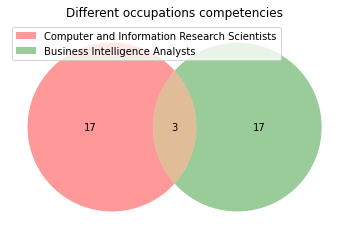

In [207]:
# Result visualization between different occupations

job1 = skills['onet_competency'].iloc[0]
job1 = ast.literal_eval(job1)
job1 = [job.split('|')[1].strip() for job in job1]

job2 = skills['onet_competency'].iloc[1]
job2 = ast.literal_eval(job2)
job2 = [job.split('|')[1].strip() for job in job2]

plot_venn(job1, job2, title='Different occupations competencies', label=['JobA', 'JobB'], \
        legend=['Computer and Information Research Scientists', 'Business Intelligence Analysts'])

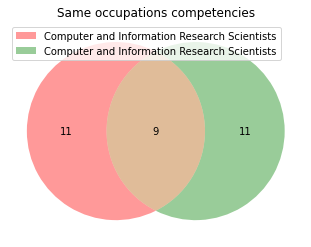

In [208]:
# Result visualization between different occupations
job3 = skills['onet_competency'].iloc[2]
job3 = ast.literal_eval(job3)
job3 = [job.split('|')[1].strip() for job in job3]

plot_venn(job1, job3, title='Same occupations competencies', label=['JobA', 'JobB'], \
        legend=['Computer and Information Research Scientists', 'Computer and Information Research Scientists'])

In [200]:
import spacy
# Download pretrained enlgish model
try:
    import en_core_web_sm
except:
    !python -m spacy download en_core_web_sm
    import en_core_web_sm

In [138]:
def process_text(text):
    doc = nlp(text)
    result = []
    for token in doc:
        if token.text in nlp.Defaults.stop_words:
            continue
        if token.is_punct:
            continue
        if token.lemma_ == '-PRON-':
            continue
        # result.append(token.lemma_)
        result.append(token.text)
    return " ".join(result)

In [139]:
nlp = en_core_web_sm.load()

In [185]:
desc1 = skills['description'].iloc[0]
desc2 = skills['description'].iloc[1]
desc3 = skills['description'].iloc[2]

In [186]:
desc1 = process_text(desc1.lower().replace("\n", '')).split()
desc2 = process_text(desc2.lower().replace("\n", '')).split()
desc3 = process_text(desc3.lower().replace("\n", '')).split()

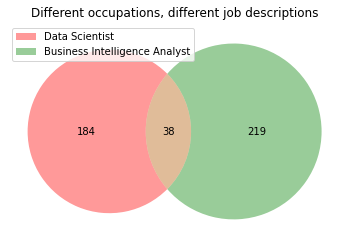

In [209]:
plot_venn(desc1, desc2, title='Different occupations, different job descriptions', label=['JobA', 'JobB'], \
        legend=['Data Scientist', 'Business Intelligence Analyst'])

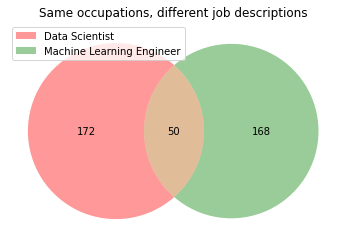

In [210]:
plot_venn(desc1, desc3, title='Same occupations, different job descriptions', label=['JobA', 'JobB'], \
        legend=['Data Scientist', 'Machine Learning Engineer'])

In [191]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [193]:
common_words = get_top_n_bigram(desc1, 20)

In [194]:
common_words

[('aquaticinformatics com', 3),
 ('https aquaticinformatics', 2),
 ('com products', 2),
 ('industry about', 1),
 ('data aquatic', 1),
 ('http aquaticinformatics', 1),
 ('com why', 1),
 ('why aquarius', 1),
 ('products watertrax', 1),
 ('products linko', 1),
 ('https www', 1),
 ('www tokay', 1),
 ('tokay com', 1),
 ('impact aquatic', 1),
 ('world about', 1),
 ('issues qualificationsmasters', 1),
 ('analysis solid', 1),
 ('machine learning', 1),
 ('learning experience', 1),
 ('principles passion', 1)]